# Topic Modelling

### Loading Data

In [1]:
import pandas as pd
import nltk

In [2]:
df = pd.read_csv("../data/news-setopati/news-setopati-processed.csv")
df

,topic,date,title,body
0,politics,"शुक्रबार, कात्तिक २४, २०८०",हर्क साम्पाङको चिठी पाएपछि हवाई नीतिविरूद्ध वि...,सामाजिक सञ्जालमा सक्रिय रहने धरानका मेयर हर्क ...
1,politics,"आइतबार, कात्तिक २६, २०८०",सरकारले भूकम्प प्रभावितलाई राहत पठाउन उपेक्षा ...,उपप्रधानमन्त्री एवं गृहमन्त्री नारायणकाजी श्रे...
2,politics,"आइतबार, कात्तिक २६, २०८०",भूकम्पले भत्किएका संरचना बनाउन त्यहीँका बेरोजग...,सरकारले भूकम्प प्रभावित क्षेत्रको पुनर्निर्माण...
3,politics,"आइतबार, कात्तिक २६, २०८०",भूकम्पपीडितलाई अस्थायी आवास बनाउन प्रतिपरिवार ...,सरकारले कात्तिक गएको भूकम्पबाट पूर्ण रूपमा घर ...
4,politics,"आइतबार, कात्तिक २६, २०८०",हमासले बन्धक बनाएका आफन्तको सुरक्षा माग गर्दै ...,प्यालेस्टाइनको इस्लामिस्ट समूह हमासको बन्धकमा ...
...,...,...,...,...
14979,politics,"बिहीबार, माघ ६, २०७८","काभ्रेमा माघ महिनाभर सभा, भेला गर्न नपाइने",कोभिड सङ्क्रमणको बढ्दो जोखिमलाई दृष्टिगत गरी ज...
14980,politics,"बिहीबार, माघ ६, २०७८",काठमाडौं उपत्यकाका तीनै जिल्ला प्रशासन कार्याल...,उपत्यकाका काठमाडौं भक्तपुर र ललितपुर जिल्ला प्...
14981,politics,"बिहीबार, माघ ६, २०७८",कोरोनाको हटस्पट बनेपछि जागेको नरैनापुर,हाम्रा स्थानीय सरकारसम्पादकीय नोट राजनीतिक अस्...
14982,politics,"बिहीबार, माघ ६, २०७८",सत्तारूढ राजनीतिक समन्वय समितिको बैठक स्थगित,आजका लागि बोलाइएको सत्तारूढ राजनीतिक समन्वय सम...


In [3]:
unprocessed_data = pd.DataFrame(columns=['body'])
unprocessed_data["body"] = df["body"].apply(str)
unprocessed_data

,body
0,सामाजिक सञ्जालमा सक्रिय रहने धरानका मेयर हर्क ...
1,उपप्रधानमन्त्री एवं गृहमन्त्री नारायणकाजी श्रे...
2,सरकारले भूकम्प प्रभावित क्षेत्रको पुनर्निर्माण...
3,सरकारले कात्तिक गएको भूकम्पबाट पूर्ण रूपमा घर ...
4,प्यालेस्टाइनको इस्लामिस्ट समूह हमासको बन्धकमा ...
...,...
14979,कोभिड सङ्क्रमणको बढ्दो जोखिमलाई दृष्टिगत गरी ज...
14980,उपत्यकाका काठमाडौं भक्तपुर र ललितपुर जिल्ला प्...
14981,हाम्रा स्थानीय सरकारसम्पादकीय नोट राजनीतिक अस्...
14982,आजका लागि बोलाइएको सत्तारूढ राजनीतिक समन्वय सम...


### Preprocessing

In [4]:
nepali_stopwords = open("../resources/stopwords.txt", "r")
stopwords = nepali_stopwords.read().split()
# print(stopwords)
print(len(stopwords))

501


In [5]:
'''
Remove unwanted characters
Remove stop words 
'''
import re
def string_manipulation(unprocessed_data)  : 
    unprocessed_data['body'] = unprocessed_data['body'].apply(lambda x: re.sub('[।(),०-९<<?!,—,–,/,’,‘,:,\u200d]', '', x))
    unprocessed_data['body'] = unprocessed_data['body'].apply(lambda x: " ".join([i.replace('\n', '').replace('\t', '').replace("\"",'') for i in x.split() if i not in (stopwords) and i != ' ']))
    return unprocessed_data

processed_data = string_manipulation(unprocessed_data)
processed_data

# processed_data = pd.DataFrame(columns=['body'])
# processed_data["body"] = df["body"]
# processed_data

,body
0,सामाजिक सञ्जालमा सक्रिय रहने धरानका मेयर हर्क ...
1,उपप्रधानमन्त्री एवं गृहमन्त्री नारायणकाजी श्रे...
2,सरकारले भूकम्प प्रभावित क्षेत्रको पुनर्निर्माण...
3,सरकारले कात्तिक भूकम्पबाट पूर्ण रूपमा भत्किएका...
4,प्यालेस्टाइनको इस्लामिस्ट समूह हमासको बन्धकमा ...
...,...
14979,कोभिड सङ्क्रमणको बढ्दो जोखिमलाई दृष्टिगत जिल्ल...
14980,उपत्यकाका काठमाडौं भक्तपुर ललितपुर जिल्ला प्रश...
14981,स्थानीय सरकारसम्पादकीय नोट राजनीतिक अस्थिरताका...
14982,आजका बोलाइएको सत्तारूढ राजनीतिक समन्वय समितिको...


In [6]:
from nepalitokenizer import NepaliTokenizer

In [7]:
'''
tokenizing the corpus 
'''
tokenize = NepaliTokenizer()
processed_data["body"] = processed_data["body"].apply(tokenize.tokenizer)
processed_data

,body
0,"[सामाजिक, सञ्जालमा, सक्रिय, रहने, धरानका, मेयर..."
1,"[उपप्रधानमन्त्री, एवं, गृहमन्त्री, नारायणकाजी,..."
2,"[सरकारले, भूकम्प, प्रभावित, क्षेत्रको, पुनर्नि..."
3,"[सरकारले, कात्तिक, भूकम्पबाट, पूर्ण, रूपमा, भत..."
4,"[प्यालेस्टाइनको, इस्लामिस्ट, समूह, हमासको, बन्..."
...,...
14979,"[कोभिड, सङ्क्रमणको, बढ्दो, जोखिमलाई, दृष्टिगत,..."
14980,"[उपत्यकाका, काठमाडौं, भक्तपुर, ललितपुर, जिल्ला..."
14981,"[स्थानीय, सरकारसम्पादकीय, नोट, राजनीतिक, अस्थि..."
14982,"[आजका, बोलाइएको, सत्तारूढ, राजनीतिक, समन्वय, स..."


In [8]:
import snowballstemmer

In [9]:
'''
Stemming & StopWord removal after Stemming
'''
stemmer = snowballstemmer.NepaliStemmer()

def get_stem(words):
    global stemmer
    new_list = stemmer.stemWords(words)
    return new_list

def clean_data(words):
    new_list = []
    for word in words:
        if len(word)>2 and word not in stopwords:
            new_list.append(word)

    return new_list
        
# ans = get_stem(["फिल्मी", "अनुराग", "वर्ष", "अघिसम्म", "उनका", "बलिउड"])
# ans

In [10]:
processed_data['body'] = processed_data['body'].apply(lambda x : get_stem(x))

In [11]:
processed_data['body'] = processed_data['body'].apply(lambda x : clean_data(x))

In [12]:
processed_data_list = processed_data['body']

### Visualization and Analysis of Data

In [13]:
'''
Finding the frequency Distribution of Words
'''
# words_list = []
# for sentence in processed_data_list:
#     words_list.extend(sentence)
# freq_dist = nltk.FreqDist(words_list)
# freq_dist.most_common(20)

'\nFinding the frequency Distribution of Words\n'

In [14]:
'''
Visualization of Most Frequency 
'''
# %config InlineBackend.figure_format = 'retina'
# import matplotlib.pyplot as plt
# from matplotlib.font_manager import FontProperties
# import seaborn as sns
# sns.set()
# nepali_font = FontProperties(fname = 'Mangal.ttf')
# temp = pd.DataFrame(freq_dist.most_common(30),  columns=['word', 'count'])
# fig, ax = plt.subplots(figsize=(10, 6))
# sns.barplot(x='word', y='count', 
#             data=temp, ax=ax)
# plt.title("Top words")
# plt.xticks(rotation='vertical',fontproperties=nepali_font);

'\nVisualization of Most Frequency \n'

In [15]:
'''
Forming Word Cloud
'''
# %config InlineBackend.figure_format = 'retina'

# from wordcloud import WordCloud
# import wordcloud
# # creation of wordcloud
# wcloud_fig = WordCloud(colormap='viridis', width=300, height=200, font_path="./Mangal.ttf").generate_from_frequencies(freq_dist)

# # plotting the wordcloud
# plt.figure(figsize=(10,7), frameon=True )

# plt.imshow(wcloud_fig, interpolation  = 'bilinear')
# plt.show()

'\nForming Word Cloud\n'

### Preparation for LDA

In [16]:
from gensim import corpora

In [17]:
from gensim.test.utils import datapath

In [63]:
'''
Representing the Corpus in dictionary: 
{unique_id : word}
'''
id2word = corpora.Dictionary(processed_data_list)
print(id2word)

Dictionary<118574 unique tokens: ['अंश', 'अधिकारी', 'अधिकृत', 'अध्ययन', 'अनिल']...>


In [19]:
'''
Checking dictionary created
'''
# count = 0
# for k, v in id2word.iteritems():
#     print(k, v)
#     count += 1
#     if count > 10:
#         break

'\nChecking dictionary created\n'

In [20]:
'''
Remove very rare and very common words:

- words appearing less than 15 times
- words appearing in more than 10% of all documents
'''
# id2word.filter_extremes(no_below=15, no_above=0.1, keep_n=100000)
id2word.filter_extremes(no_below=15, no_above=0.1, keep_n=None)

In [21]:
'''
bag-of-words format = list of (token_id, token_count) 2-tuples
'''
#  now lets create a encoded bag of words 
bow_corpus = [id2word.doc2bow(sent) for sent in processed_data_list]
# bow_corpus[0] 

In [22]:
'''
Preview BOW for our sample preprocessed document
'''
# Here document_num is document number 4310 which we have checked in Step 2
# document_num = 4310
# bow_doc_4310 = bow_corpus[document_num]
# count = 0

# for i in range(len(bow_doc_4310)):
#     print("Word {} (\"{}\") appears {} time.".format(bow_doc_4310[i][0], 
#                                                      id2word[bow_doc_4310[i][0]], 
#                                                      bow_doc_4310[i][1]))
#     count += 1
#     if count > 10:
#         break

'\nPreview BOW for our sample preprocessed document\n'

### LDA - (BOW)

In [23]:
# Creating the object for LDA model using gensim library
import gensim
from gensim.models import CoherenceModel

In [24]:
'''
Loading the Saved Model
'''
#loading model from disk
# from gensim import  models

# temp_file = datapath("./lda_model_politics_30")
# lda_model = models.ldamodel.LdaModel.load(temp_file)

'\nLoading the Saved Model\n'

In [25]:
'''
Train your lda model using gensim.models.LdaMulticore and save it to 'lda_model'
'''
LDA = gensim.models.ldamulticore.LdaMulticore
# lda_model = LDA(corpus=corpus_matrix,id2word=id2word, num_topics=10, random_state=100,update_every=1,chunksize=100,passes=5,alpha='auto',per_word_topics=True)

lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=30, id2word=id2word, passes=50, workers=5)

In [64]:
'''
For Saving  Model
'''
#saving model to disk.
temp_file = datapath("./lda_model_politics_30")
lda_model.save(temp_file)

In [27]:
'''
For each topic, we will explore the words occuring in that topic and its relative weight
'''
for idx, topic in lda_model.print_topics(-1):
    print("Topic: {} \nWords: {}".format(topic, idx ))
    print("\n")

Topic: 0.021*"दिवस" + 0.018*"अवसर" + 0.015*"व्यक्त" + 0.013*"शुभकामना" + 0.011*"एवं" + 0.010*"सामाजिक" + 0.010*"सन्देश" + 0.010*"पुन" + 0.010*"निधन" + 0.009*"भण्डारी" 
Words: 0


Topic: 0.025*"पत्र" + 0.024*"मतदाता" + 0.018*"घोषणा" + 0.015*"नामावली" + 0.015*"मिति" + 0.013*"खर्च" + 0.012*"विवरण" + 0.011*"चिन्ह" + 0.010*"सूचना" + 0.010*"मतपत्र" 
Words: 1


Topic: 0.065*"अदालत" + 0.040*"आदेश" + 0.034*"मुद्" + 0.030*"सर्वोच्च" + 0.023*"रिट" + 0.016*"इजलास" + 0.015*"फैसला" + 0.013*"न्यायाधीश" + 0.011*"सजाय" + 0.011*"निवेदन" 
Words: 2


Topic: 0.040*"सडक" + 0.019*"कम्पनी" + 0.017*"ठेक्" + 0.016*"पदार्थ" + 0.016*"आयोजना" + 0.015*"सवारी" + 0.013*"मूल्य" + 0.012*"प्राधिकरण" + 0.012*"पुल" + 0.011*"सम्झौता" 
Words: 3


Topic: 0.033*"अनुसन्धान" + 0.022*"प्रहरी" + 0.020*"प्रकरण" + 0.020*"पक्राउ" + 0.016*"खाण" + 0.015*"गृहमन्त्री" + 0.014*"छानबिन" + 0.013*"शरणार्" + 0.011*"भ्रष्टाचार" + 0.010*"भुटानी" 
Words: 4


Topic: 0.049*"मतदान" + 0.027*"कोशी" + 0.017*"राई" + 0.015*"कार्की" + 0.012*"बहुमत" + 0.

In [28]:
'''
This groups the documents by their topic, for e.g
{
    0 : [list of documents in topic index 0]
}
'''

cluster_by_topic = {}
[cluster_by_topic.setdefault(i, []) for i in range(lda_model.num_topics)]
index = 0
for bow in bow_corpus:
    topics_list = lda_model.get_document_topics(bow,minimum_probability=0.8)
    for topic_id, score in topics_list: 
        cluster_by_topic[topic_id].append(index)
    index += 1

In [66]:
df

,topic,date,title,body
0,politics,"शुक्रबार, कात्तिक २४, २०८०",हर्क साम्पाङको चिठी पाएपछि हवाई नीतिविरूद्ध वि...,सामाजिक सञ्जालमा सक्रिय रहने धरानका मेयर हर्क ...
1,politics,"आइतबार, कात्तिक २६, २०८०",सरकारले भूकम्प प्रभावितलाई राहत पठाउन उपेक्षा ...,उपप्रधानमन्त्री एवं गृहमन्त्री नारायणकाजी श्रे...
2,politics,"आइतबार, कात्तिक २६, २०८०",भूकम्पले भत्किएका संरचना बनाउन त्यहीँका बेरोजग...,सरकारले भूकम्प प्रभावित क्षेत्रको पुनर्निर्माण...
3,politics,"आइतबार, कात्तिक २६, २०८०",भूकम्पपीडितलाई अस्थायी आवास बनाउन प्रतिपरिवार ...,सरकारले कात्तिक गएको भूकम्पबाट पूर्ण रूपमा घर ...
4,politics,"आइतबार, कात्तिक २६, २०८०",हमासले बन्धक बनाएका आफन्तको सुरक्षा माग गर्दै ...,प्यालेस्टाइनको इस्लामिस्ट समूह हमासको बन्धकमा ...
...,...,...,...,...
14979,politics,"बिहीबार, माघ ६, २०७८","काभ्रेमा माघ महिनाभर सभा, भेला गर्न नपाइने",कोभिड सङ्क्रमणको बढ्दो जोखिमलाई दृष्टिगत गरी ज...
14980,politics,"बिहीबार, माघ ६, २०७८",काठमाडौं उपत्यकाका तीनै जिल्ला प्रशासन कार्याल...,उपत्यकाका काठमाडौं भक्तपुर र ललितपुर जिल्ला प्...
14981,politics,"बिहीबार, माघ ६, २०७८",कोरोनाको हटस्पट बनेपछि जागेको नरैनापुर,हाम्रा स्थानीय सरकारसम्पादकीय नोट राजनीतिक अस्...
14982,politics,"बिहीबार, माघ ६, २०७८",सत्तारूढ राजनीतिक समन्वय समितिको बैठक स्थगित,आजका लागि बोलाइएको सत्तारूढ राजनीतिक समन्वय सम...


In [29]:
'''
# Printing the documents that belong to a certain topic 
# '''
for k,v in cluster_by_topic.items():
    print ("Topic : {}".format(lda_model.print_topic(k)))
    print ("---------------------------------------------------")
    for paths in v:
        print (paths)
    print ("---------------------------------------------------")


Topic : 0.021*"दिवस" + 0.018*"अवसर" + 0.015*"व्यक्त" + 0.013*"शुभकामना" + 0.011*"एवं" + 0.010*"सामाजिक" + 0.010*"सन्देश" + 0.010*"पुन" + 0.010*"निधन" + 0.009*"भण्डारी"
---------------------------------------------------
315
324
852
1147
1151
1190
1333
1337
1578
2589
2884
2885
3677
4175
4363
4364
5502
5852
6229
6230
6922
6931
6932
7164
7165
7166
7636
7637
7813
7814
8376
8477
9091
9356
9358
9549
9691
10206
10995
11088
11100
11105
11106
11107
11363
12259
12331
12332
13538
13539
13929
13930
13996
13999
14723
14724
---------------------------------------------------
Topic : 0.025*"पत्र" + 0.024*"मतदाता" + 0.018*"घोषणा" + 0.015*"नामावली" + 0.015*"मिति" + 0.013*"खर्च" + 0.012*"विवरण" + 0.011*"चिन्ह" + 0.010*"सूचना" + 0.010*"मतपत्र"
---------------------------------------------------
5974
7957
8360
8584
8696
8706
8715
8717
8719
8786
8794
8798
8805
8810
8816
8829
9023
9132
9276
9751
9753
9804
10134
10176
10283
10331
10365
10384
10399
10999
11551
11679
11758
11762
11796
11958
12208
12547
12869
1

In [30]:
'''
Printing the top 5 documents in each topics
'''
my_ids = [i for i in range(len(bow_corpus))]

top_documents = {}
[top_documents.setdefault(i, []) for i in range(lda_model.num_topics)]

for topic_id in range(lda_model.num_topics):
    tops = sorted(zip(my_ids, lda_model[bow_corpus]), reverse=True, key=lambda x: abs(dict(x[1]).get(topic_id, 0.0)))
    top_five =  tops[ : 5]
    for index, _ in top_five:
        top_documents[topic_id].append(index)

In [31]:
'''
Printing the documents that belong to a certain topic 
'''
for k,v in top_documents.items():
    print ("Topic : {}".format(lda_model.print_topic(k)))
    print ("---------------------------------------------------")
    for paths in v:
        print (paths)
    print ("---------------------------------------------------")

Topic : 0.021*"दिवस" + 0.018*"अवसर" + 0.015*"व्यक्त" + 0.013*"शुभकामना" + 0.011*"एवं" + 0.010*"सामाजिक" + 0.010*"सन्देश" + 0.010*"पुन" + 0.010*"निधन" + 0.009*"भण्डारी"
---------------------------------------------------
10995
6230
6229
11105
12332
---------------------------------------------------
Topic : 0.025*"पत्र" + 0.024*"मतदाता" + 0.018*"घोषणा" + 0.015*"नामावली" + 0.015*"मिति" + 0.013*"खर्च" + 0.012*"विवरण" + 0.011*"चिन्ह" + 0.010*"सूचना" + 0.010*"मतपत्र"
---------------------------------------------------
10176
9751
10365
8786
10999
---------------------------------------------------
Topic : 0.065*"अदालत" + 0.040*"आदेश" + 0.034*"मुद्" + 0.030*"सर्वोच्च" + 0.023*"रिट" + 0.016*"इजलास" + 0.015*"फैसला" + 0.013*"न्यायाधीश" + 0.011*"सजाय" + 0.011*"निवेदन"
---------------------------------------------------
7440
5115
5126
5153
5158
---------------------------------------------------
Topic : 0.040*"सडक" + 0.019*"कम्पनी" + 0.017*"ठेक्" + 0.016*"पदार्थ" + 0.016*"आयोजना" + 0.015*"सवारी" +

In [32]:
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
19     0.079216 -0.157620       1        1  9.292714
15     0.192084 -0.021743       2        1  6.580502
8      0.113113  0.069898       3        1  5.639374
6     -0.209791 -0.031633       4        1  5.322131
21     0.168261  0.026922       5        1  4.227469
2     -0.066244  0.201178       6        1  4.058707
10    -0.183423 -0.129049       7        1  3.945628
12     0.159329 -0.041650       8        1  3.790260
16    -0.038505  0.052501       9        1  3.757593
4     -0.039589  0.196317      10        1  3.742933
23     0.068811 -0.080515      11        1  3.393048
27    -0.182883 -0.079757      12        1  3.369200
17     0.042875  0.103553      13        1  3.286653
9     -0.127837 -0.125244      14        1  3.258422
24    -0.136322  0.064718      15        1  3.182025
29     0.037073 -0.201596      16        1  3.180660
0      0.122000 -0.166126      17        1  2.918211
26    -0.132882 -0.066066      18        1  2.707416
13    -0.089522  0.119240      19        1  2.552923
25     0.121896 -0.055925      20        1  2.514256
1     -0.046588  0.049173      21        1  2.406095
22     0.164241  0.027248      22        1  2.393669
5     -0.094563 -0.098119      23        1  2.087455
20    -0.059716  0.178596      24        1  2.066617
7     -0.102115 -0.071176      25        1  2.036483
18     0.007479 -0.047673      26        1  1.996676
3      0.111736  0.140419      27        1  1.853430
14    -0.095262  0.079866      28        1  1.663223
11     0.175553  0.007414      29        1  1.410902
28     0.041574  0.056848      30        1  1.365324, topic_info=              Term         Freq        Total Category  logprob  loglift
431         विधेयक  4433.000000  4433.000000  Default  30.0000  30.0000
365          अदालत  4796.000000  4796.000000  Default  29.0000  29.0000
1559        प्रहरी  4970.000000  4970.000000  Default  28.0000  28.0000
522   मुख्यमन्त्री  3766.000000  3766.000000  Default  27.0000  27.0000
1292      नागरिकता  3840.000000  3840.000000  Default  26.0000  26.0000
...            ...          ...          ...      ...      ...      ...
273           बाटो   145.593735  1332.753341  Topic30  -4.9598   2.0796
201            सडक   150.640997  2051.595195  Topic30  -4.9257   1.6823
1559        प्रहरी   159.177696  4970.493150  Topic30  -4.8706   0.8525
279        सम्बोधन   130.449872  1843.093992  Topic30  -5.0697   1.6456
536           सहरी   104.917838   454.989046  Topic30  -5.2875   2.8267

[2048 rows x 6 columns], token_table=      Topic      Freq            Term
term                                 
5274      1  0.956367        अँध्यारो
9346      9  0.973461         अंगिकृत
2923      9  0.994720         अंगीकृत
1903      1  0.062962            अखिल
1903      4  0.051157            अखिल
...     ...       ...             ...
721      15  0.843555        होप्रदेश
982      15  0.964184  होमुख्यमन्त्री
8367      9  0.917919          होसंसद
5497     14  0.954642        होसभापति
8010      9  0.946738        होसभामुख

[10399 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[20, 16, 9, 7, 22, 3, 11, 13, 17, 5, 24, 28, 18, 10, 25, 30, 1, 27, 14, 26, 2, 23, 6, 21, 8, 19, 4, 15, 12, 29])

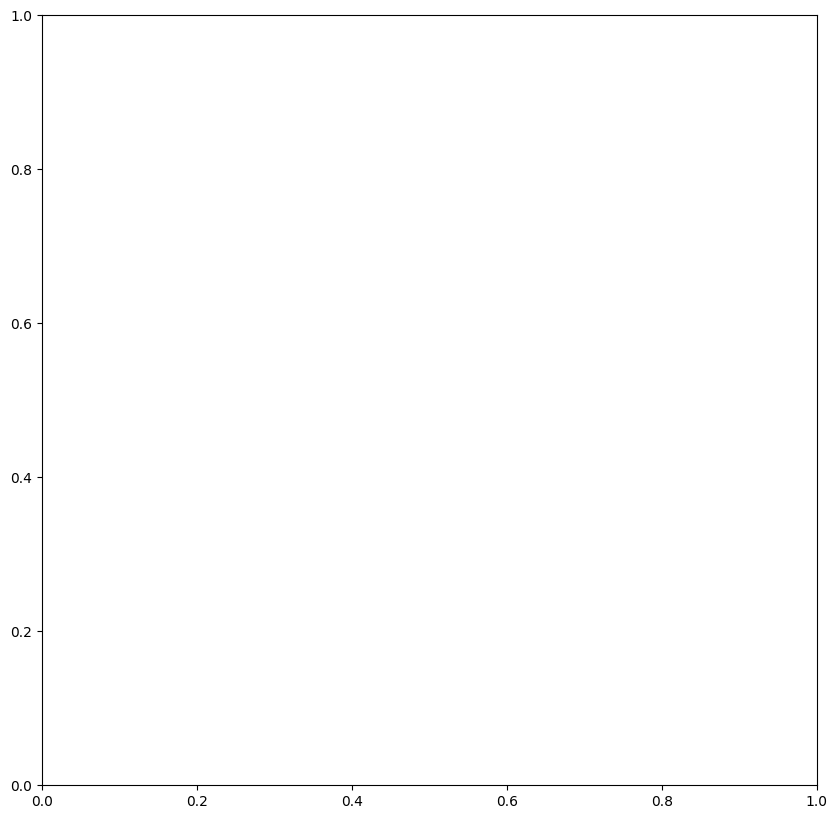

In [33]:
fig, ax = plt.subplots(figsize=(10, 10))
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus = bow_corpus, dictionary = id2word)
vis

### LDA - (TF-IDF)

In [34]:
'''
Create tf-idf model object using models.TfidfModel on 'bow_corpus' and save it to 'tfidf'
'''
# from gensim import corpora, models

# tfidf = models.TfidfModel(bow_corpus)

"\nCreate tf-idf model object using models.TfidfModel on 'bow_corpus' and save it to 'tfidf'\n"

In [35]:
'''
Apply transformation to the entire corpus and call it 'corpus_tfidf'
'''
# corpus_tfidf = tfidf[bow_corpus]

"\nApply transformation to the entire corpus and call it 'corpus_tfidf'\n"

In [36]:
'''
Preview TF-IDF scores for our first document --> --> (token_id, tfidf score)
'''
# count = 0
# from pprint import pprint
# for doc in corpus_tfidf:
#     pprint(doc)
#     count +=1
#     if count > 10 :
#         break

'\nPreview TF-IDF scores for our first document --> --> (token_id, tfidf score)\n'

In [37]:
# import operator

In [38]:
'''
This took more than 20 minutes so i had to stop
It attempts to keep training lda model until the thresold is reached
'''
def ret_top_model():
    """
    Since LDAmodel is a probabilistic model, it comes up different topics each time we run it. To control the
    quality of the topic model we produce, we can see what the interpretability of the best topic is and keep
    evaluating the topic model until this threshold is crossed. 
    
    Returns:
    -------
    lm: Final evaluated topic model
    top_topics: ranked topics in decreasing order. List of tuples
    """
    # top_topics = [(0, 0)]
    # while top_topics[0][1] < 0.97:

    #     lm = gensim.models.LdaMulticore(bow_corpus, num_topics=20, id2word=id2word, passes=2, workers=2)
    #     coherence_values = {}
    #     for n, topic in lm.show_topics(num_topics=-1, formatted=False):
    #         topic = [word for word, _ in topic]
    #         cm = CoherenceModel(topics=[topic], texts=processed_data_list, dictionary=id2word, window_size=10)
    #         coherence_values[n] = cm.get_coherence()
    #     top_topics = sorted(coherence_values.items(), key=operator.itemgetter(1), reverse=True)
    #     print(top_topics[0][1])
    # return lm, top_topics

In [39]:
# lm, top_topics = ret_top_model()

### HDP

In [40]:
# from gensim.models import HdpModel

In [41]:
# hdp_model = gensim.models.HdpModel(bow_corpus, id2word=id2word)

In [42]:
'''
For each topic, we will explore the words occuring in that topic and its relative weight
'''
# for idx, topic in hdp_model.print_topics(-1):
#     print("Topic: {} \nWords: {}".format(topic, idx ))
#     print("\n")

'\nFor each topic, we will explore the words occuring in that topic and its relative weight\n'

In [43]:
# document_dict = {
#     0 : "Manoranjan",
#     1000 : "Sahitya",
#     2000 : "Suchana Prabhidhi",
#     3000 : "Bichar",
#     4350 : "Swasthya",
#     5000 : "Prabas",
#     6000 : "Khelkud",
#     7000 : "Viswa",
#     8000 : "Desh",
#     9000 : "Artha",
# }
# document_num = 9200 
# print()
# # Our test document is document number 4310
# for k,v in document_dict.items():
#     print("\n{}\n".format(v))
#     for index, score in sorted(hdp_model[bow_corpus[k]], key=lambda tup: -1*tup[1]):
#         print("\nScore: {}\t \nTopic: {}".format(score, hdp_model.print_topic(index, 5)))

In [44]:
# '''
# Define lda model using corpus_tfidf, again using gensim.models.LdaMulticore()
# '''

# lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, 
#                                        num_topics=25, 
#                                        id2word = id2word, 
#                                        passes = 2, 
#                                        workers=2)

In [45]:
# '''
# For each topic, we will explore the words occuring in that topic and its relative weight
# '''
# for idx, topic in lda_model_tfidf.print_topics(-1):
#     print("Topic: {} Word: {}".format(idx, topic))
#     print("\n")

In [46]:
# '''
# Check which topic our test document belongs to using the LDA TF-IDF model.
# '''
# # Our test document is document number 4310
# for index, score in sorted(lda_model_tfidf[bow_corpus[document_num]], key=lambda tup: -1*tup[1]):
#     print("\nScore: {}\t \nTopic: {}".format(score, lda_model_tfidf.print_topic(index, 10)))

In [47]:
# lda_model.print_topics()

### Unseen Document Topic Identification 

In [48]:
df1 = pd.DataFrame(columns=['body'])
df1

,body


In [49]:
'''
Unseen Document
'''

# Artha
# df1.loc[0] = ['''
# 	सहकारीको घरजग्गा लगानी रोक्नुपर्छ अर्थमन्त्रीसहकारी मार्फत घरजग्गा क्षेत्रमा भएको लगानीमा जोखिम देखिन थालेकोले त्यसलाई रोक्नुपर्ने अर्थमन्त्री वर्षमान पुनले बताएका छन्  राष्ट्र बैंकको निरीक्षणमा गएका बेला पुनले घरजग्गा कारोबारी बैंकबाट सरेर सहकारी पुगेको भन्दै कारोबार रोक्नुपर्ने बताएका थिए  "
# 	सहकारी मार्फत घरजग्गा क्षेत्रमा भएको लगानीमा जोखिम देखिन थालेकोले त्यसलाई रोक्नुपर्ने अर्थमन्त्री वर्षमान पुनले बताएका छन्  राष्ट्र बैंकको निरीक्षणमा गएका बेला पुनले घरजग्गा कारोबारी बैंकबाट सरेर सहकारी पुगेको भन्दै कारोबार रोक्नुपर्ने बताएका थिए   
# 	राष्ट्र बैंकले नियमन गर्ने संस्थाहरू वाणिज्य बैंक विकास बैंक र फाइनान्स कम्पनीलाई घरजग्गा क्षेत्रमा लगानी गर्न पाउने सीमा तोकेको छ  यी संस्थाबाट ऋण लिन गाह्रो भएपछि घरजग्गा कारोबारी सहकारीतर्फ आकषिर्त भएका हुन्  फितलो नियमनका कारण पनि सहकारीबाट घरजग्गामा लगानी गर्न सजिलो रहेको विशेषज्ञ बताउँछन्   
# 	सहकारी विभागले एक वर्षअघि गरेको अध्ययनमा सहकारीको घरजग्गामा ठूलो लगानी देखिएको थियो   करोड रुपैयाँभन्दा बढी कारोबार गर्ने  सहकारीमा गरिएको उक्त अध्ययनले कुल लगानीको  प्रतिशतसम्म घरजग्गामा गएको देखिएको थियो  त्यसपछि विभागले समय तोकेर यस्तो ऋण घटाउन निर्देशन दिएको उपसचिव विष्णुप्रसाद घिमिरेले बताए  राष्ट्र बैंकको निर्देशन जस्तै तोकिएको समयमा घरजग्गा क्षेत्रको लगानी घटाउन निर्देशन दिएका थियौं उनले भने  तर यस्तो ऋण घटेनघटेकोबारे पछिल्लो जानकारी विभागसँग छैन   
# 	बलियो कानुन र कर्मचारी अभाव रहेको विभागले घरजग्गामा भएको लगानीबारे कुनै अनुसन्धान गर्न सकेको छैन   
# 	पहिलेको तुलनामा घरजग्गा क्षेत्रमा हुने लगानी केही घटेको तर यकिन तथ्यांक नरहेको घिमिरेले बताए   
# 	गत आर्थिक वर्षमा सहकारीको कुल कारोबार  खर्ब  अर्ब रुपैयाँ पुगेको छ  यो वित्तीय क्षेत्रको  प्रतिशत हुन्छ   
# 	विभागको तथ्यांक अनुसार गत आर्थिक वर्षमा  अर्ब  करोड सेयर पुँजी रहेका सहकारीले  खर्ब  अर्ब निक्षेप संकलन गरेर  खर्ब  अर्ब लगानी गरेका थिए   
# 	मुलुकभर  हजार  सय  सहकारी छन्  जसमा  हजार  सय  वटा बचत तथा ऋण सहकारी छन्  यस्ता सहकारीले सबैभन्दा बढी निक्षेप संकलन र लगानी गरेका छन्  यी संस्था बढी व्यापारमुखी रहेकाले घरजग्गा लगायतका क्षेत्रमा बढी लगानी गरेका छन्   
# 	यसबाहेक मुलुकमा  हजार  सय  बहुउद्देश्यीय सहकारी  हजार  सय  कृषि सहकारी  हजार  सय  दुग्ध उत्पादक सहकारी र  हजार  सय  उपभोक्ता सहकारी छन्   
# 	सहकारीको संख्या बर्सेनि बढ्दै गएपछि नियमन गर्ने विभागमा भने कर्मचारी पर्याप्त छैनन्  पछिल्लो समय विभागमा  सय  कर्मचारी कार्यरत छन्   
# 	''' ]

# Rajniti
df1.loc[0] = ['''
नेपाली कांग्रेसले कोशी प्रदेशमा विकसित भएको राजनीतिक घटनाक्रमलाई अप्रत्याशित र आकस्मिक भनेको छ।
प्रचार विभाग प्रमुख मीनबहादुर विश्वकर्माले अप्रत्याशित र आकस्मिक घटना भएको बताए।
कोशीमा सत्ता गठबन्धनले नेकपा माओवादी केन्द्रका इन्द्र आङ्बोलाई मुख्यमन्त्री बनाउने बिहीबार बालुवाटारमा छलफल गरेर सहमति गरेको थियो।
तर नेता शेखर कोइरालानिकट कोशीका सांसदले मुख्यमन्त्री माओवादीलाई छाड्न चाहेनन्। कोइरालानिकट कोशी कांग्रेस सांसद केदार कार्कीले एमालेका ३९ र कांग्रेसका ८ गरी कूल ४७ जना सांसद (बहुमत) को हस्ताक्षर पेश गर्दै प्रदेश प्रमुखकहाँ मुख्यमन्त्रीमा दाबी पेश गरेका छन्।
कोशीमा कांग्रेसका २९ जना सांसद छन्।
कांग्रेस, माओवादी, एकीकृत समाजवादी र जसपा संसदीय दल नेताको हस्ताक्षरसहित माओवादीका आङ्बोले पनि मुख्यमन्त्रीमा दाबी गरेका छन्।
कोशी प्रदेश प्रमुख परशुराम खापुङ्गले संविधानको धारा १६८ को उपधारा ५ अनुसार असोज २६ गते अपराह्न ५ बजेभित्र मुख्यमन्त्रीमा दाबी पेश गर्न समय दिएका थिए। 
गत असोज २० गते हिक्मत कार्कीले मुख्यमन्त्री पदबाट राजीनामा दिएका थिए।
कांग्रेससहित केन्द्रमा सरकार बनाएको सत्ता गठबन्धनका दलका शीर्ष नेताहरूले कोशीमा माओवादीको मुख्यमन्त्री बनाउन सहमति गरे पनि कांग्रेस कोशीका केही सांसदहरूले यो निर्णय अस्वीकार गरेका हुन्।
कोशीमा विकसित राजनीतिक घटनाक्रम अप्रत्याशित भएको कांग्रेस प्रचार विभाग प्रमुख विश्वकर्माले बताए। ‘पार्टीका सबै नेताहरूसँग छलफल गरेर नै निर्णयमा पुगिएको थियो तर आकस्मिक र अप्रत्याशित घटना भएको छ। यसबारे पार्टीले बैठक नै गरेर धारणा बनाउनुपर्छ,’ उनले भने।
''' ]

# Khelkud
# df1.loc[0] = ['''
# फिफा विश्वकप २०२६ अन्तर्गत एसिया छनोटको पहिलो चरणको खेलमा नेपाल र लाओसले एक-एक गोलको बराबरी खेलेका छन्।
# दशरथ रंगशालामा बिहीबार भएको खेलमा नेपालले एक गोलले पछि परेको स्थिति उल्टाएको थियो।
# खेलमा लाओसका कप्तान बुङकोङले ३३ मिनेटमा गोल गर्दा घरेलु दर्शक स्तब्ध बनेको थियो।
# तर दोस्रो हाफमा नेपालका लागि अञ्जन बिष्टले बराबरी गोल गर्दै नेपालको हार टारे।
# उनले बराबरी गोलसँगै नेपालका लागि सर्वाधिक अन्तर्राष्ट्रिय गोलको कीर्तिमान बराबरी गरेका छन्। अञ्जनले खेलको ४९ मिनेटमा गोल गरेका थिए।
# अञ्जनले ९ वर्ष राष्ट्रिय टिमबाट खेल्दा १३ गोल गरेका हुन्। उनले हरि खड्का र नीराजन रायमाझीको १३ गोलको कीर्तिमान बराबरी गर्न सफल भए। अब नेपाल र लाओसबीचको दोस्रो लेगको खेल १७ अक्टोबरमा लाओसमा हुनेछ।
# ''' ]

df1

,body
0,\nनेपाली कांग्रेसले कोशी प्रदेशमा विकसित भएको ...


In [50]:
'''
Preparing the Bag of Words
'''
df1['body'] = df1['body'].apply(str)
processed_new_data = string_manipulation(df1)
df1

,body
0,नेपाली कांग्रेसले कोशी प्रदेशमा विकसित राजनीति...


In [51]:
processed_new_data["body"] = processed_new_data["body"].apply(tokenize.tokenizer)

In [52]:
processed_new_data['body'] = processed_new_data['body'].apply(lambda x : get_stem(x))
# processed_new_data.news.to_list()

In [53]:
processed_new_data['body'] = processed_new_data['body'].apply(lambda x : clean_data(x))
for l in processed_new_data.body.to_list():
    print(len(l))

136


In [54]:
'''
Finds the topic and corresponding score for the unseen document 
'''
# Data preprocessing step for the unseen document
list_of_string = processed_new_data.body.to_list()[0] 
bow_vector = id2word.doc2bow(list_of_string)


for index, score in sorted(lda_model[bow_vector], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, lda_model.print_topic(index, 5)))

Score: 0.39940351247787476	 Topic: 0.073*"मुख्यमन्त्री" + 0.022*"नियुक्त" + 0.021*"कर्णाली" + 0.016*"प्रदेशसभा" + 0.014*"मन्त्रिपरिषद"
Score: 0.26893550157546997	 Topic: 0.049*"मतदान" + 0.027*"कोशी" + 0.017*"राई" + 0.015*"कार्की" + 0.012*"बहुमत"
Score: 0.12646052241325378	 Topic: 0.060*"शर्मा" + 0.044*"विभाग" + 0.035*"छानबिन" + 0.031*"राजीना" + 0.029*"प्रतिवेदन"
Score: 0.09630890190601349	 Topic: 0.031*"भट्टराई" + 0.018*"सचिवालय" + 0.017*"बोला" + 0.017*"निवास" + 0.015*"बाबुराम"
Score: 0.06800414621829987	 Topic: 0.036*"कोइराला" + 0.028*"थापा" + 0.023*"महामन्त्री" + 0.015*"महाधिवेशन" + 0.013*"शेखर"
Score: 0.029286254197359085	 Topic: 0.026*"प्रहरी" + 0.023*"घटना" + 0.017*"पीडित" + 0.010*"आरोप" + 0.009*"बलात्कार"


### Document Similarity - JensenShanon Distance

In [55]:
import numpy as np

In [56]:
'''
Obtaining the topic distribution of every document
'''
doc_topic_dist = []
for bow in bow_corpus:
    topics_list = lda_model.get_document_topics(bow,minimum_probability=0)
    # print(topics_list)
    row = []
    for idx, score in topics_list:
        row.append(score)

    doc_topic_dist.append(row)

print(len(doc_topic_dist))

14984


In [57]:
doc_distribution = np.array(doc_topic_dist)
doc_distribution.shape

(14984, 30)

In [58]:
new_dist = []
for idx,score in lda_model.get_document_topics(bow_vector, minimum_probability=0):
    new_dist.append(score)

new_doc_distribution = np.array(new_dist)
new_doc_distribution.shape
# new_doc_distribution = np.array([tup[1] for tup in lda_model[bow_vector]])
# new_doc_distribution.shape

(30,)

In [59]:
from scipy.stats import entropy
from scipy.spatial import distance

In [60]:
# def jensen_shannon(query, matrix):
#     """
#     This function implements a Jensen-Shannon similarity
#     between the input query (an LDA topic distribution for a document)
#     and the entire corpus of topic distributions.
#     It returns an array of length M where M is the number of documents in the corpus
#     """
#     # lets keep with the p,q notation above
#     p = query[None,:].T # take transpose
#     q = matrix.T # transpose matrix
#     m = 0.5*(p + q)
#     return np.sqrt(0.5*(entropy(p,m) + entropy(q,m)))

def jensen_shannon(query, matrix):
    """
    This function implements a Jensen-Shannon similarity
    between the input query (an LDA topic distribution for a document)
    and the entire corpus of topic distributions.
    """
    sim = [distance.jensenshannon(data,query) for data in matrix]
    return np.array(sim)

In [61]:
def get_most_similar_documents(query,matrix,k=10):
    """
    This function implements the Jensen-Shannon distance above
    and retruns the top k indices of the smallest jensen shannon distances
    """
    sims = jensen_shannon(query,matrix) # list of jensen shannon distances
    return sims.argsort()[:k] # the top k positional index of the smallest Jensen Shannon distances

In [62]:
most_sim_ids = get_most_similar_documents(new_doc_distribution, doc_distribution)
# print(most_sim_ids)
for ids in most_sim_ids:
    print(ids)

484
519
437
2709
488
414
423
503
428
415
